In [1]:
from microstructpy.markets.continuous import ContinuousDoubleAuction
from microstructpy.traders.market_maker import *
from microstructpy.traders.informed import *
from microstructpy.traders.noise import *
from microstructpy.traders.strategy import *

from microstructpy.visualization.summary import participant_comparison, price_path
from microstructpy.metrics.trader import participants_report

In [2]:
market   = ContinuousDoubleAuction(initial_fair_price=1000)

mm       = BaseMarketMaker(market,
                           fair_price_strategy=OrderFlowMagnitudeFairPrice(window=10, aggressiveness=1),
                           volume_strategy=MaxFractionVolume(fraction=0.1), 
                           spread_strategy=OrderFlowImbalanceSpread(window=5, aggressiveness=10, min_halfspread=3),
                           max_inventory=1000)

informed = TWAPInformedTrader(market)
noise    = NoiseTrader(market, submission_rate=1, volume_size=lambda:np.random.randint(1, 5))

market.run(300)

100%|██████████| 300/300 [00:00<00:00, 6516.98it/s]


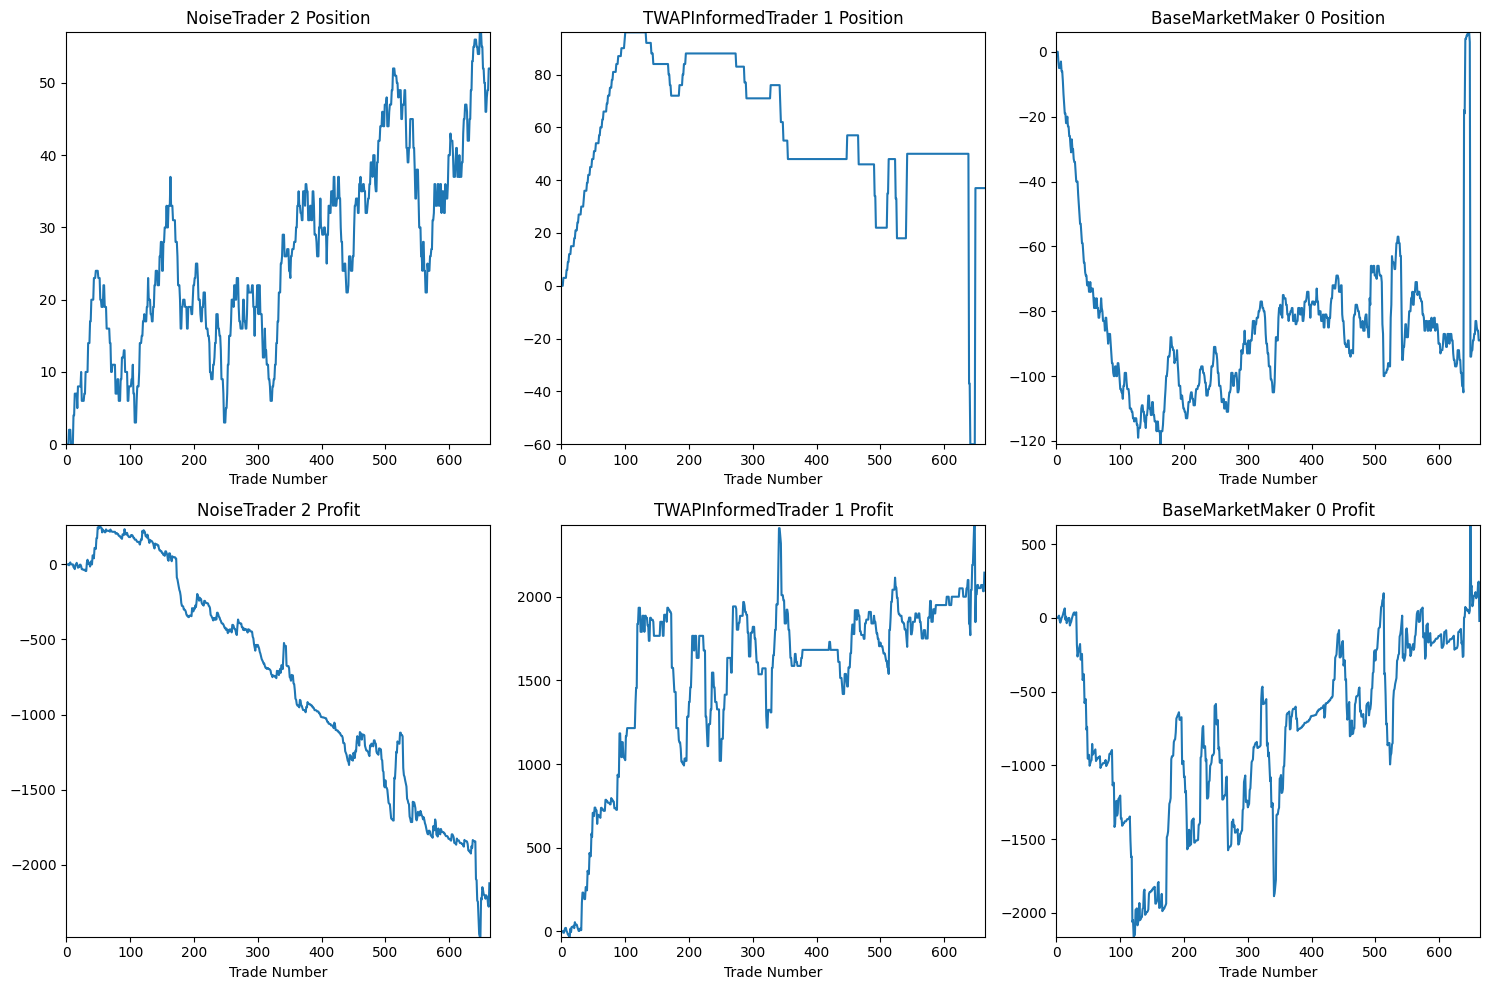

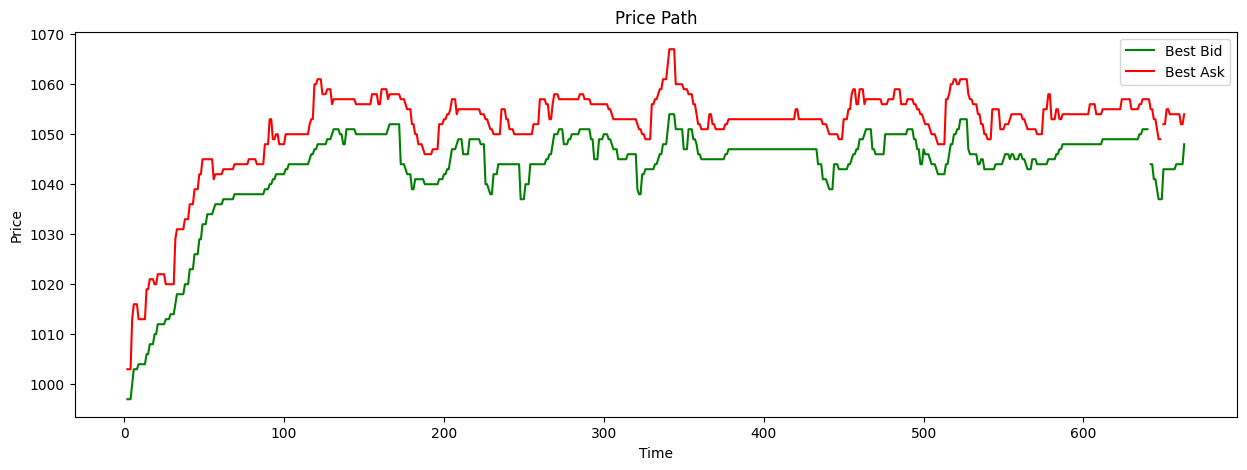

In [3]:
participant_comparison(market.participants)
price_path(market)

In [4]:
participants_report(market.participants)

,NoiseTrader_2,TWAPInformedTrader_1,BaseMarketMaker_0
final_profit,-2124.00,2145.00,-21.00
final_position,52.00,37.00,-89.00
profit_per_state,-3.20,3.24,-0.03
std_profit_per_state,32.78,68.18,89.65
information_ratio,-0.10,0.05,-0.00
total_trades,299.00,63.00,362.00
volume_traded,758.00,525.00,1283.00
profit_per_volume,-2.80,4.09,-0.02
average_trade_size,2.54,8.33,3.54
fill_rate,1.00,0.84,0.02


In [5]:
df = participants_report(market.participants)
print(df.to_markdown())

|                      |   NoiseTrader_2 |   TWAPInformedTrader_1 |   BaseMarketMaker_0 |
|:---------------------|----------------:|-----------------------:|--------------------:|
| final_profit         |        -2124    |                2145    |              -21    |
| final_position       |           52    |                  37    |              -89    |
| profit_per_state     |           -3.2  |                   3.24 |               -0.03 |
| std_profit_per_state |           32.78 |                  68.18 |               89.65 |
| information_ratio    |           -0.1  |                   0.05 |               -0    |
| total_trades         |          299    |                  63    |              362    |
| volume_traded        |          758    |                 525    |             1283    |
| profit_per_volume    |           -2.8  |                   4.09 |               -0.02 |
| average_trade_size   |            2.54 |                   8.33 |                3.54 |
| fill_rat

In [6]:
from microstructpy.metrics.market import quoted_spread

<Axes: >

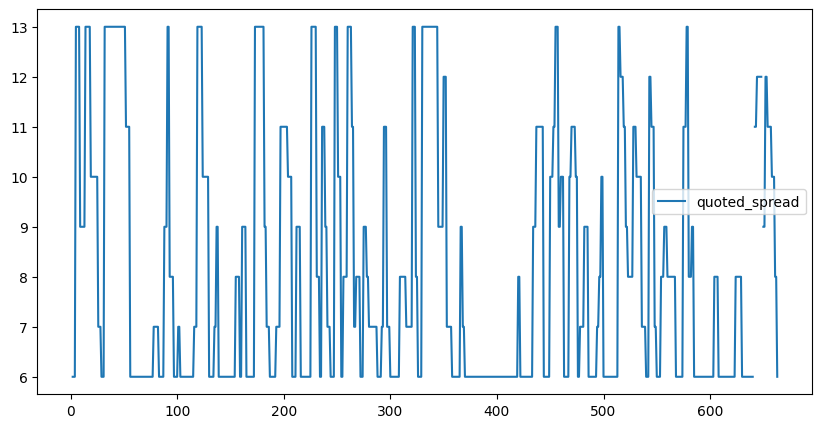

In [8]:
quoted_spread(market).plot(figsize=(10, 5))